In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading data
purchasing_df=pd.read_csv('QVI_purchase_behaviour.csv')
purchasing_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
#rows vs columns
purchasing_df.shape

(72637, 3)

In [4]:
purchasing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
#checking data types
purchasing_df.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [6]:
#null values
purchasing_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
#Check for zero values
df_zeros = purchasing_df[purchasing_df == 0.0].count()
df_zeros
df_zeros[df_zeros > 0]

Series([], dtype: int64)

In [8]:
#Remove trailing spaces at the end of columns
purchasing_df.columns = purchasing_df.columns.str.strip()

In [9]:
#checking for duplicates
purchasing_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
72632    False
72633    False
72634    False
72635    False
72636    False
Length: 72637, dtype: bool

In [10]:
#data consistency
purchasing_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [11]:
#total count per column
purchasing_df['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [12]:
purchasing_df['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [13]:
purchasing_df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [14]:
transactions_df=pd.read_excel('QVI_transaction_data.xlsx')
transactions_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [15]:
transactions_df.shape

(264836, 8)

In [16]:
transactions_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [17]:
#Merge transaction and purchasing df on Loyalty card nbr column

merged_df = pd.merge(purchasing_df, transactions_df, on='LYLTY_CARD_NBR')

display(merged_df)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
264834,2370961,OLDER FAMILIES,Budget,43400,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2


In [18]:
#lets filter for columns with atleast one null value
merged_df.isnull().sum()[merged_df.isnull().sum()>0]

Series([], dtype: int64)

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [20]:
#to check for Zeros in df
merged_df_zeros = merged_df[merged_df == 0.0].count()
merged_df_zeros

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

In [21]:
#lets convert DATE to DATETIME type
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'],unit='D', origin='1899-12-30')


In [22]:
merged_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264836 non-null  int64         
 1   LIFESTAGE         264836 non-null  object        
 2   PREMIUM_CUSTOMER  264836 non-null  object        
 3   DATE              264836 non-null  datetime64[ns]
 4   STORE_NBR         264836 non-null  int64         
 5   TXN_ID            264836 non-null  int64         
 6   PROD_NBR          264836 non-null  int64         
 7   PROD_NAME         264836 non-null  object        
 8   PROD_QTY          264836 non-null  int64         
 9   TOT_SALES         264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


In [24]:
merged_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

In [25]:
#checking for prod name and quantities
merged_df['PROD_NAME'].value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [26]:
# Examining the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips
product_words = set(merged_df['PROD_NAME'])
product_words


{'Burger Rings 220g',
 'CCs Nacho Cheese    175g',
 'CCs Original 175g',
 'CCs Tasty Cheese    175g',
 'Cheetos Chs & Bacon Balls 190g',
 'Cheetos Puffs 165g',
 'Cheezels Cheese 330g',
 'Cheezels Cheese Box 125g',
 'Cobs Popd Sea Salt  Chips 110g',
 'Cobs Popd Sour Crm  &Chives Chips 110g',
 'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
 'Dorito Corn Chp     Supreme 380g',
 'Doritos Cheese      Supreme 330g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Doritos Corn Chips  Cheese Supreme 170g',
 'Doritos Corn Chips  Nacho Cheese 170g',
 'Doritos Corn Chips  Original 170g',
 'Doritos Mexicana    170g',
 'Doritos Salsa       Medium 300g',
 'Doritos Salsa Mild  300g',
 'French Fries Potato Chips 175g',
 'Grain Waves         Sweet Chilli 210g',
 'Grain Waves Sour    Cream&Chives 210G',
 'GrnWves Plus Btroot & Chilli Jam 180g',
 'Infuzions BBQ Rib   Prawn Crackers 110g',
 'Infuzions Mango     Chutny Papadums 70g',
 'Infuzions SourCream&Herbs Veg St

In [27]:
#removing all words with digits and special characters such as ‘&’ from our set of product words
product_words = [word for word in product_words if not any(char.isdigit() for char in word)]


In [28]:
#I can see there are products which arent chips
merged_df['SALSA'] = merged_df['PROD_NAME'].str.lower().str.contains('salsa')

# Remove rows where SALSA is True
merged_df = merged_df[merged_df['SALSA'] == False]

# Drop the SALSA column
merged_df.drop(columns=['SALSA'], inplace=True)


In [29]:
merged_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [30]:
merged_df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.467420e+05,246742,246742.000000,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,1.355310e+05,2018-12-30 01:19:01.211468288,135.051098,1.351311e+05,56.351789,1.908062,7.321322
min,1.000000e+03,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.700000
25%,7.001500e+04,2018-09-30 00:00:00,70.000000,6.756925e+04,26.000000,2.000000,5.800000
50%,1.303670e+05,2018-12-30 00:00:00,130.000000,1.351830e+05,53.000000,2.000000,7.400000
75%,2.030840e+05,2019-03-31 00:00:00,203.000000,2.026538e+05,87.000000,2.000000,8.800000
max,2.373711e+06,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,200.000000,650.000000
std,8.071528e+04,NaN,76.787096,7.814772e+04,33.695428,0.659831,3.077828


In [31]:
merged_df.duplicated().sum()

1

In [32]:
# Check for duplicate rows
duplicate_rows = merged_df[merged_df.duplicated()]
duplicate_rows.drop_duplicates(inplace=True)

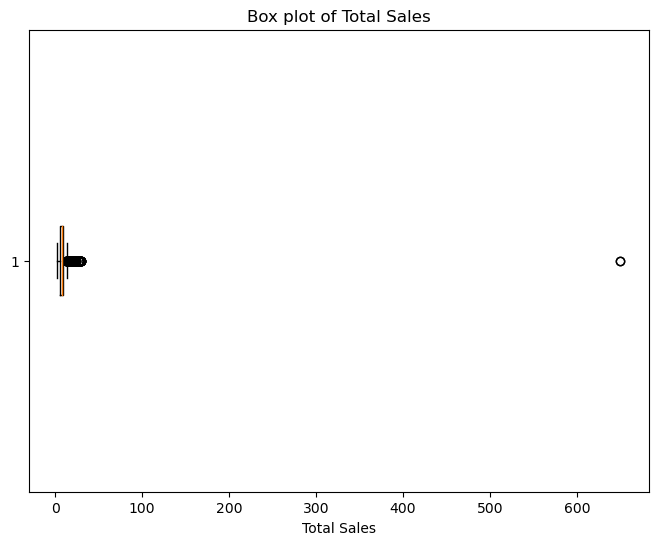

In [33]:
# Extracting the TOT_SALES column
df = merged_df['TOT_SALES']

plt.figure(figsize=(8, 6))
plt.boxplot(df, vert=False)
plt.title('Box plot of Total Sales')
plt.xlabel('Total Sales')
plt.show()


In [34]:
#Checking for rows with highest sales which happens to be the outlier
outlier_row=merged_df[merged_df['TOT_SALES']==merged_df['TOT_SALES'].max()]
outlier_row

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221625,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221626,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [35]:
#Lets drop this rows
# Get the index of the row(s) with the highest total sales
outlier_index = outlier_row.index

# Drop the row with the highest total sales/outlier
df_clean = merged_df.drop(outlier_index)


In [36]:
df_clean.describe()


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.467400e+05,246740,246740.000000,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,1.355303e+05,2018-12-30 01:18:58.448569344,135.050361,1.351304e+05,56.352213,1.906456,7.316113
min,1.000000e+03,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.700000
25%,7.001500e+04,2018-09-30 00:00:00,70.000000,6.756875e+04,26.000000,2.000000,5.800000
50%,1.303670e+05,2018-12-30 00:00:00,130.000000,1.351815e+05,53.000000,2.000000,7.400000
75%,2.030832e+05,2019-03-31 00:00:00,203.000000,2.026522e+05,87.000000,2.000000,8.800000
max,2.373711e+06,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,5.000000,29.500000
std,8.071520e+04,NaN,76.786971,7.814760e+04,33.695235,0.342499,2.474897


In [37]:
#checking for rows with lowest sales
df_clean[df_clean['TOT_SALES']==df_clean['TOT_SALES'].min()]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
67,1062,YOUNG FAMILIES,Premium,2018-11-23,1,71,92,WW Crinkle Cut Chicken 175g,1,1.7
74,1067,OLDER SINGLES/COUPLES,Mainstream,2018-10-27,1,78,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7
76,1068,YOUNG SINGLES/COUPLES,Premium,2019-01-10,1,80,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7
80,1072,NEW FAMILIES,Premium,2019-04-04,1,85,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7
107,1097,RETIREES,Budget,2019-05-05,1,113,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7
...,...,...,...,...,...,...,...,...,...,...
259592,268484,YOUNG FAMILIES,Premium,2018-09-26,268,264936,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7
260056,269069,OLDER SINGLES/COUPLES,Mainstream,2018-08-17,269,265407,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7
260969,269214,OLDER FAMILIES,Budget,2019-05-19,269,266340,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7
262665,270213,RETIREES,Premium,2019-05-15,270,268046,72,WW Crinkle Cut Original 175g,1,1.7


In [38]:
#Clasffying large sales based on the mean of total sales
df_clean['Large Sales'] = df_clean['TOT_SALES']>df_clean['TOT_SALES'].mean()
df_clean['Large Quantity'] =df_clean['PROD_QTY']>df_clean['PROD_QTY'].mean()

df_clean['Large Sales'].value_counts()


Large Sales
True     137991
False    108749
Name: count, dtype: int64

<Axes: xlabel='PROD_QTY'>

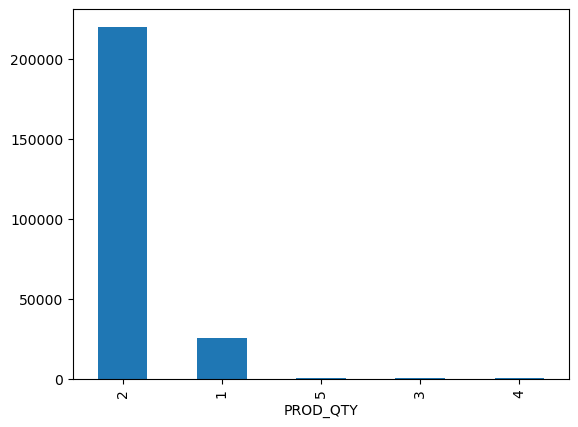

In [39]:
#visualling product qunatity
df_clean['PROD_QTY'].value_counts().plot.bar()

In [40]:
df_clean['PROD_QTY'].value_counts()

PROD_QTY
2    220070
1     25476
5       415
3       408
4       371
Name: count, dtype: int64

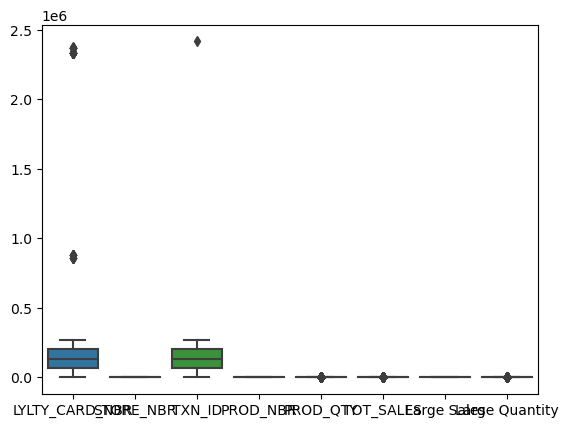

In [41]:
#Visually checking for skewdeness in data
sns.boxplot(data=df_clean)
plt.show()

In [42]:
#Count number of transactions by date
# Group the data by the 'DATE' column and count the number of transactions in each group
transactions_by_date = df_clean.groupby('DATE').size()

transactions_by_date_desc = transactions_by_date.sort_values(ascending=False)

# Display the result
print("Number of transactions by date (in descending order):")
print(transactions_by_date_desc)


Number of transactions by date (in descending order):
DATE
2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Length: 364, dtype: int64


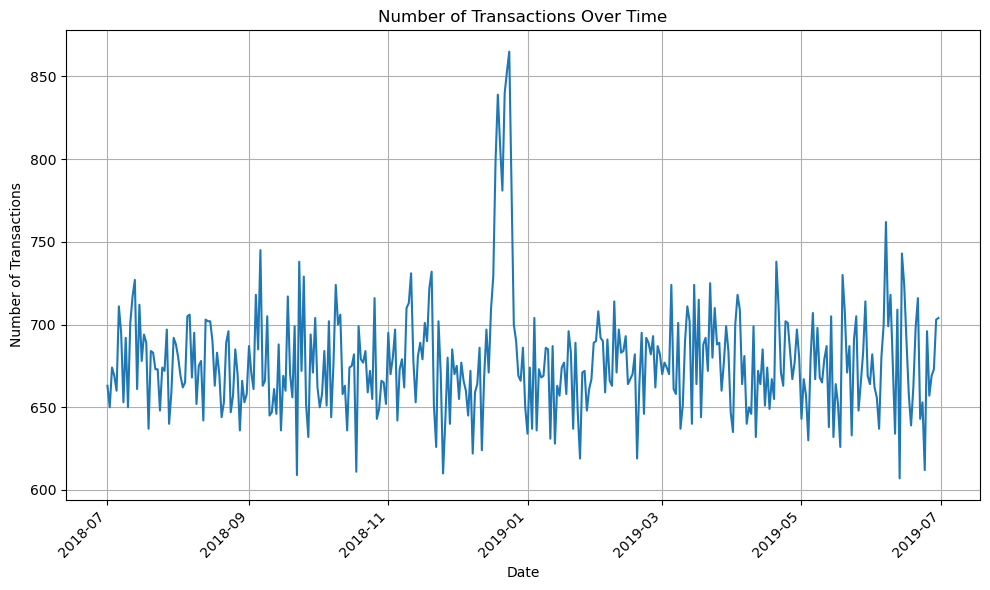

In [43]:
#ploting a time series
plt.figure(figsize=(10, 6))
transactions_by_date_desc.plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

I can see that there is an increase in purchases in December and a break in late December. Let’s zoom in
on this.


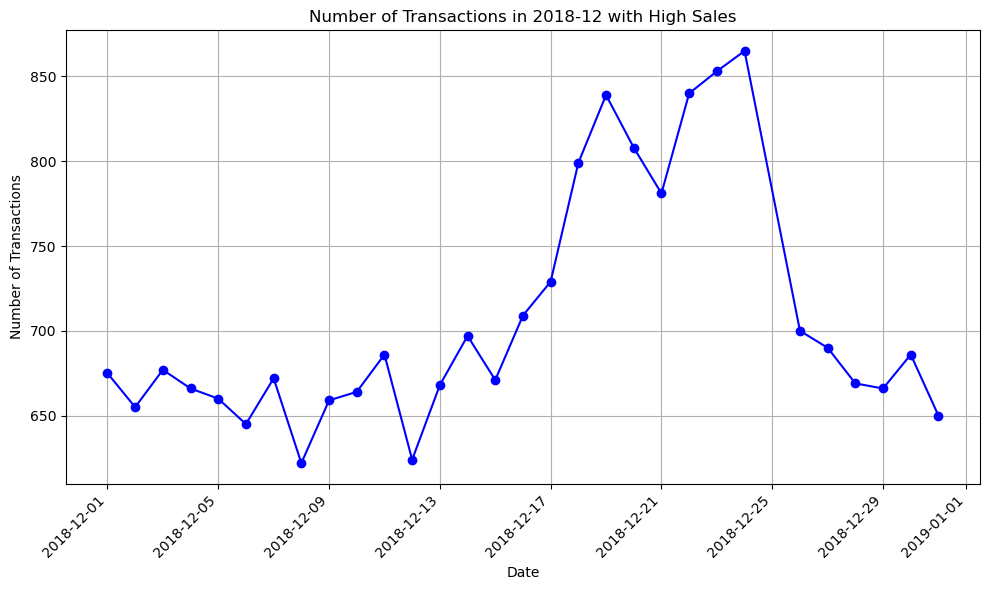

In [44]:
 #Selecting the transactions for a particular month with high sales
target_month = '2018-12'  # Change this to the month you're interested in
transactions_in_target_month = transactions_by_date_desc[target_month]

# Plot the time series of number of transactions for the selected month
plt.figure(figsize=(10, 6))
transactions_in_target_month.plot(marker='o', color='b')
plt.title(f'Number of Transactions in {target_month} with High Sales')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

I can see that the increase in sales occurs in the build-up to Christmas season and that there are no sales on
Christmas day itself. This is due to shops being closed on Christmas day.
Now that I am satisfied that the data no longer has outliers, I can now move on to creating other features
such as brand of chips or pack size from PROD_NAME.I will start with pack size.


In [45]:
# Extract pack sizes from the 'PROD_NAME' column using regular expressions
df_clean['PACK_SIZE'] = df_clean['PROD_NAME'].str.extract(r'(\d+)(?=[Gg]|\s*[Gg])')


df_clean['PACK_SIZE'] = pd.to_numeric(df_clean['PACK_SIZE'])

# Check if the pack sizes look sensible
pack_size_counts = df_clean['PACK_SIZE'].value_counts().sort_index()
print("Pack sizes and their frequencies:")
print(pack_size_counts)

Pack sizes and their frequencies:
PACK_SIZE
70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    40203
160     2970
165    15297
170    19983
175    66390
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
330    12540
380     6416
Name: count, dtype: int64


The largest size is 380g and the smallest size is 70g - I think it is reasonable


In [46]:
df_clean

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Large Sales,Large Quantity,PACK_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,False,True,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,False,False,150
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,False,False,210
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,False,False,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,False,False,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,True,True,380
264831,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,False,True,210
264832,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,True,True,150
264833,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,True,True,165


<Axes: >

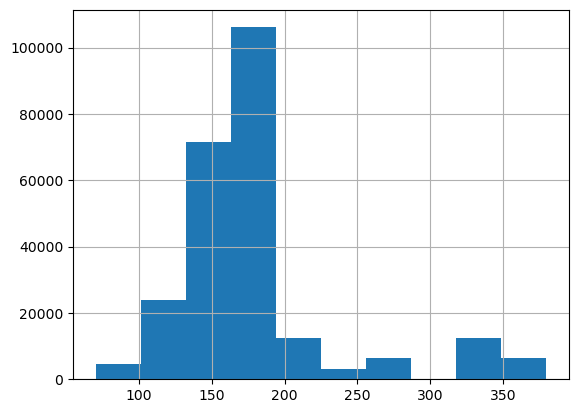

In [47]:
df_clean['PACK_SIZE'].hist()

Pack sizes created look reasonable and now to create brands, I can use the first word in PROD_NAME to
work out the brand name

In [48]:

# Extract brand names from the 'PROD_NAME' column
df_clean['BRAND'] = df_clean['PROD_NAME'].str.split().str[0].str.upper()

# Check the counts of each brand
brand_counts = df_clean['BRAND'].value_counts().sort_values(ascending=False)
print("Counts of each brand:")
print(brand_counts)


Counts of each brand:
BRAND
KETTLE        41288
SMITHS        27390
PRINGLES      25102
DORITOS       22041
THINS         14075
RRD           11894
INFUZIONS     11057
WW            10320
COBS           9693
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
GRAIN          6272
NATURAL        6050
CHEEZELS       4603
CCS            4551
RED            4427
DORITO         3183
INFZNS         3144
SMITH          2963
CHEETOS        2927
SNBTS          1576
BURGER         1564
WOOLWORTHS     1516
GRNWVES        1468
SUNBITES       1432
NCC            1419
FRENCH         1418
Name: count, dtype: int64


Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red
Rock Deli chips. Let’s combine these together.

In [49]:
df_clean['BRAND'] = df_clean['BRAND'].str.replace('RRD','RED')
df_clean['BRAND'] = df_clean['BRAND'].str.replace("SNBTS","SUNBITES")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("INFZNS","INFUZIONS")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("WW","WOOLWORTHS")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("SMITH", "SMITHS")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("NCC", "NATURAL")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("DORITO","DORITOS")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("GRAIN","GRNWVES")


In [50]:
print("Unique values in 'BRAND' column after replacements:")
print(df_clean['BRAND'].unique())

Unique values in 'BRAND' column after replacements:
['NATURAL' 'RED' 'GRNWVES' 'WOOLWORTHS' 'CHEETOS' 'INFUZIONS' 'DORITOSS'
 'SMITHSS' 'KETTLE' 'CCS' 'TOSTITOS' 'COBS' 'BURGER' 'THINS' 'TYRRELLS'
 'SMITHS' 'CHEEZELS' 'TWISTIES' 'SUNBITES' 'PRINGLES' 'FRENCH' 'DORITOS']


In [51]:
# Perform replacements
df_clean['BRAND'] = df_clean['BRAND'].str.replace('RRD','RED')
df_clean['BRAND'] = df_clean['BRAND'].str.replace("SNBTS","SUNBITES")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("INFZNS","INFUZIONS")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("WW","WOOLWORTHS")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("SMITHS", "SMITH")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("NCC", "NATURAL")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("DORITOSS","DORITOS")
df_clean['BRAND'] = df_clean['BRAND'].str.replace("GRAIN","GRNWVES")


In [52]:
print("Unique values in 'BRAND' column after replacements:")
print(df_clean['BRAND'].unique())

Unique values in 'BRAND' column after replacements:
['NATURAL' 'RED' 'GRNWVES' 'WOOLWORTHS' 'CHEETOS' 'INFUZIONS' 'DORITOS'
 'SMITHS' 'KETTLE' 'CCS' 'TOSTITOS' 'COBS' 'BURGER' 'THINS' 'TYRRELLS'
 'SMITH' 'CHEEZELS' 'TWISTIES' 'SUNBITES' 'PRINGLES' 'FRENCH']


Who spends the most on chips (total sales), describing customers by lifestage and how premium their
general purchasing behaviour is?


In [56]:
#This is to find total amount spent by a customer in every segent
Customers = df_clean.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': "sum"}).sort_values(by='TOT_SALES', ascending=True)
Customers

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
NEW FAMILIES           Premium            10760.80
                       Mainstream         15979.70
                       Budget             20607.45
MIDAGE SINGLES/COUPLES Budget             33345.70
YOUNG SINGLES/COUPLES  Premium            39052.30
MIDAGE SINGLES/COUPLES Premium            54443.85
YOUNG SINGLES/COUPLES  Budget             57122.10
OLDER FAMILIES         Premium            75242.60
YOUNG FAMILIES         Premium            78571.70
MIDAGE SINGLES/COUPLES Mainstream         84734.25
YOUNG FAMILIES         Mainstream         86338.25
RETIREES               Premium            91296.65
OLDER FAMILIES         Mainstream         96413.55
RETIREES               Budget            105916.30
OLDER SINGLES/COUPLES  Premium           123537.55
                       Mainstream        124648.50
                       Budget            127833.60
YOUNG FAMILIES         Budget            129717.95
RETIREES               Mainstream        145168.95
YOUNG SINGLES/COUPLES  Mainstream        147582.20
OLDER FAMILIES         Budget            156863.75

In [57]:
df_clean["PREMIUM_CUSTOMER"].value_counts()

PREMIUM_CUSTOMER
Mainstream    95043
Budget        86762
Premium       64935
Name: count, dtype: int64

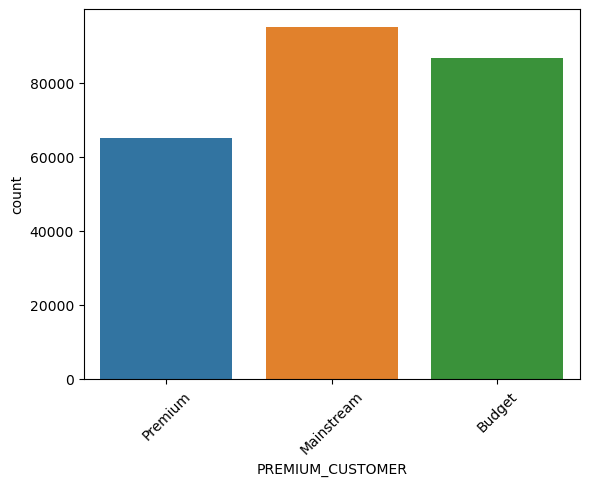

In [58]:
sns.countplot(data=df_clean, x='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.show()

In [59]:
df_clean["LIFESTAGE"].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     50793
RETIREES                  46431
OLDER FAMILIES            45158
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
Name: count, dtype: int64

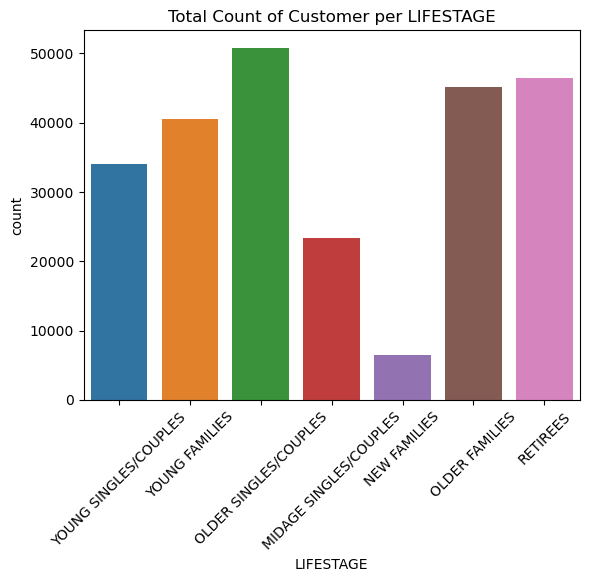

In [62]:
sns.countplot(data=df_clean, x='LIFESTAGE')
plt.xticks(rotation=45)
plt.title('Total Count of Customer per LIFESTAGE')
plt.show()

In [80]:
chips_bought_per_customer=df_clean.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg({'PROD_QTY':'sum'}).reset_index()
chips_bought_per_customer

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY
0,Budget,MIDAGE SINGLES/COUPLES,8883
1,Budget,NEW FAMILIES,5241
2,Budget,OLDER FAMILIES,41853
3,Budget,OLDER SINGLES/COUPLES,32883
4,Budget,RETIREES,26932
5,Budget,YOUNG FAMILIES,34482
6,Budget,YOUNG SINGLES/COUPLES,15500
7,Mainstream,MIDAGE SINGLES/COUPLES,21213
8,Mainstream,NEW FAMILIES,4060
9,Mainstream,OLDER FAMILIES,25804


In [76]:
#This is to find total amount spent by different family stages
Customers_df=df_clean.groupby(['LIFESTAGE']).agg({'TOT_SALES':"sum"}).reset_index()
Customers_df

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,172523.80
1,NEW FAMILIES,47347.95
2,OLDER FAMILIES,328519.90
3,OLDER SINGLES/COUPLES,376019.65
4,RETIREES,342381.90
5,YOUNG FAMILIES,294627.90
6,YOUNG SINGLES/COUPLES,243756.60


In [69]:
# Product Categories
product_sales = df_clean.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False)
top_product_categories = product_sales.head(10)
print("Top 10 Product Categories by Total Sales:")
print(top_product_categories)

Top 10 Product Categories by Total Sales:
PROD_NAME
Dorito Corn Chp     Supreme 380g            39052.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Name: TOT_SALES, dtype: float64


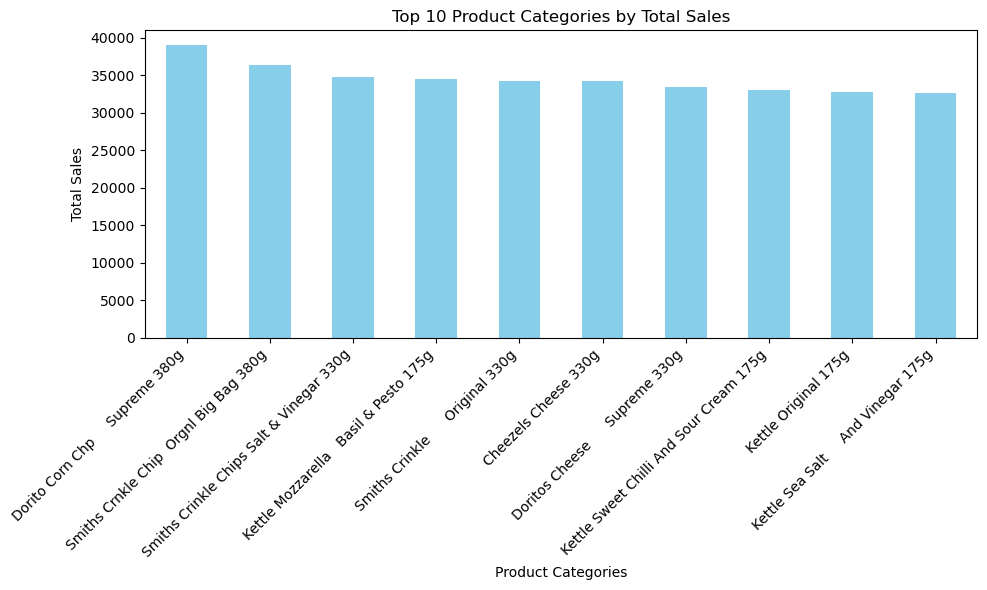

In [70]:
# Create a bar plot
plt.figure(figsize=(10, 6))
top_product_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Total Sales')
plt.xlabel('Product Categories')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
# Product Categories
product_sale = df_clean.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=True)
bottom_product_categories = product_sale.head(10)
print("Bottom 10 Product Categories by Total Sales:")
print(bottom_product_categories)

Bottom 10 Product Categories by Total Sales:
PROD_NAME
WW Crinkle Cut      Original 175g           4532.2
Sunbites Whlegrn    Crisps Frch/Onin 90g    4600.2
WW Crinkle Cut      Chicken 175g            4702.2
Snbts Whlgrn Crisps Cheddr&Mstrd 90g        5076.2
Woolworths Cheese   Rings 190g              5169.6
WW D/Style Chip     Sea Salt 200g           5249.7
WW Sour Cream &OnionStacked Chips 160g      5323.8
WW Original Stacked Chips 160g              5323.8
WW Original Corn    Chips 200g              5367.5
WW Supreme Cheese   Corn Chips 200g         5390.3
Name: TOT_SALES, dtype: float64


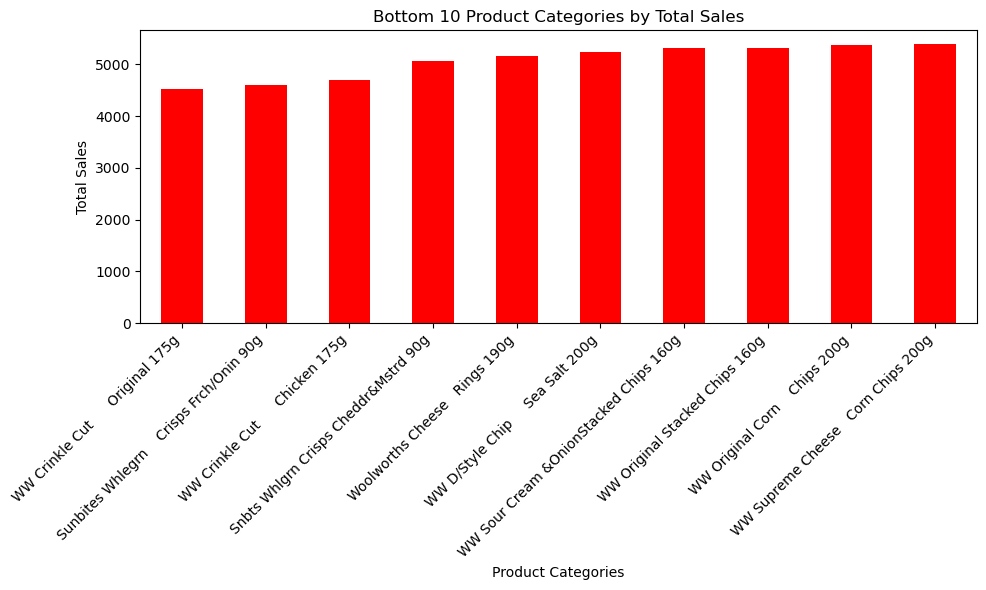

In [72]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bottom_product_categories.plot(kind='bar', color='red')
plt.title('Bottom 10 Product Categories by Total Sales')
plt.xlabel('Product Categories')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [78]:
df_clean.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg({'TOT_SALES':'mean'})

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           MIDAGE SINGLES/COUPLES   7.108442
                 NEW FAMILIES             7.297256
                 OLDER FAMILIES           7.291241
                 OLDER SINGLES/COUPLES    7.444305
                 RETIREES                 7.445786
                 YOUNG FAMILIES           7.302705
                 YOUNG SINGLES/COUPLES    6.663023
Mainstream       MIDAGE SINGLES/COUPLES   7.637156
                 NEW FAMILIES             7.313364
                 OLDER FAMILIES           7.281440
                 OLDER SINGLES/COUPLES    7.306049
                 RETIREES                 7.269352
                 YOUNG FAMILIES           7.226772
                 YOUNG SINGLES/COUPLES    7.551279
Premium          MIDAGE SINGLES/COUPLES   7.152371
                 NEW FAMILIES             7.231720
                 OLDER FAMILIES           7.232779
                 OLDER SINGLES/COUPLES    7.459997
                 RETIREES                 7.461315
                 YOUNG FAMILIES           7.285951
                 YOUNG SINGLES/COUPLES    6.673325

In [81]:
cleaned_data=df_clean.to_csv('df_clean.csv', index=False)